### 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spst

### 데이터 불러오기
- train set은 target이 없으므로, test만을 이용하여 ANOVA 분석을 실시한다.

In [2]:
train = pd.read_csv("C:/LG_Aimers/data/train.csv")

In [3]:
train  = train.drop(columns = ["ID"])

### X와 y 나누기

In [4]:
X = train.iloc[:,:56]
X.drop(columns =["X_04","X_10","X_11","X_23","X_47","X_48"],inplace = True)
X_bin = X.copy()
y = train.iloc[:,56:]

### bins 나누기
- 분산분석의 경우, 범주형 자료와 범주형 자료를 비교할 때 사용된다. 우리가 가지고 있는 자료는 수치형 자료이므로, 범주형 자료로 임의로 변환해야한다.

- 정규분포가 따를 때까지 bins를 분리하는 작업을 실시할 수 있겠으나, 우리가 가지고 있는 시간이 많지 않으므로, 이를 포기하고 그냥 matplotlib에서 분리해주는 대로 자동으로 분리를 시킨다.

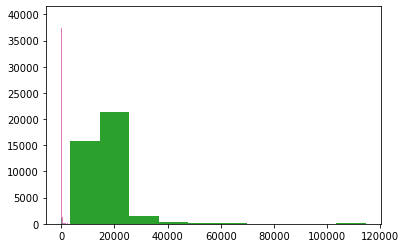

In [5]:
for i in X.columns :
    bins = list(plt.hist(X[i])[1])
    bins.insert(0,-np.inf)
    bins.append(np.inf)
    X_bin[i] = pd.cut(X[i],bins = bins,labels = [i for i in range(len(bins)-1)],right = False)

- 이 후, 범주의 갯수를 확인하는 작업을 실시하고, 범주에 맞는 함수를 짜주자. 범주의 갯수는 아래와 같이 책정됨을 알 수 있다.

In [6]:
X_bin = pd.concat([X_bin,y],axis = 1)

In [30]:
bins_X = X_bin.iloc[:,:50]
bin_count = []
for i in bins_X.columns :
    bin_count.append(len(list(bins_X[i].unique())))


- 우리가 필요한 함수는 2,3,4,6,7,8,9,10,11개의 범주로 ANOVA Test를 실시하는 함수임을 알 수 있다.

In [89]:
pd.DataFrame(bin_count)[0].value_counts()

11    27
10     9
9      4
6      3
7      2
8      2
2      1
3      1
4      1
Name: 0, dtype: int64

### ANOVA Function
- 각각의 범주를 결정해주고, ANOVA 검정을 해주는 코드를 작성한다.

In [7]:
# cart 11
def ANOVA_11(columns) :
    p_set = []
    for i in y.columns :
        temp = []
        for j in X_bin[columns].unique() :
            temp.append(X_bin.loc[X_bin[columns] == j, i])
        p_set.append(spst.f_oneway(temp[0],temp[1],temp[2],temp[3],temp[4],temp[5],temp[6],temp[7],temp[8],temp[9],temp[10])[1])
    return p_set

In [8]:
# cart 2
def ANOVA_2(columns) :
    p_set = []
    for i in y.columns :
        temp = []
        for j in X_bin[columns].unique() :
            temp.append(X_bin.loc[X_bin[columns] == j, i])
        p_set.append(spst.f_oneway(temp[0],temp[1])[1])
    return p_set

In [9]:
# cart 6
def ANOVA_6(columns) :
    p_set = []
    for i in y.columns :
        temp = []
        for j in X_bin[columns].unique() :
            temp.append(X_bin.loc[X_bin[columns] == j, i])
        p_set.append(spst.f_oneway(temp[0],temp[1],temp[2],temp[3],temp[4],temp[5])[1])
    return p_set

In [10]:
# cart 10
def ANOVA_10(columns) :
    p_set = []
    for i in y.columns :
        temp = []
        for j in X_bin[columns].unique() :
            temp.append(X_bin.loc[X_bin[columns] == j, i])
        p_set.append(spst.f_oneway(temp[0],temp[1],temp[2],temp[3],temp[4],temp[5],temp[6],temp[7],temp[8],temp[9])[1])
    return p_set

In [11]:
# cart 9
def ANOVA_9(columns) :
    p_set = []
    for i in y.columns :
        temp = []
        for j in X_bin[columns].unique() :
            temp.append(X_bin.loc[X_bin[columns] == j, i])
        p_set.append(spst.f_oneway(temp[0],temp[1],temp[2],temp[3],temp[4],temp[5],temp[6],temp[7],temp[8])[1])
    return p_set

In [12]:
# cart 7
def ANOVA_7(columns) :
    p_set = []
    for i in y.columns :
        temp = []
        for j in X_bin[columns].unique() :
            temp.append(X_bin.loc[X_bin[columns] == j, i])
        p_set.append(spst.f_oneway(temp[0],temp[1],temp[2],temp[3],temp[4],temp[5],temp[6])[1])
    return p_set

In [13]:
# cart 8
def ANOVA_8(columns) :
    p_set = []
    for i in y.columns :
        temp = []
        for j in X_bin[columns].unique() :
            temp.append(X_bin.loc[X_bin[columns] == j, i])
        p_set.append(spst.f_oneway(temp[0],temp[1],temp[2],temp[3],temp[4],temp[5],temp[6],temp[7])[1])
    return p_set

In [14]:
# cart 3
def ANOVA_3(columns) :
    p_set = []
    for i in y.columns :
        temp = []
        for j in X_bin[columns].unique() :
            temp.append(X_bin.loc[X_bin[columns] == j, i])
        p_set.append(spst.f_oneway(temp[0],temp[1],temp[2])[1])
    return p_set

In [15]:
# cart 4
def ANOVA_4(columns) :
    p_set = []
    for i in y.columns :
        temp = []
        for j in X_bin[columns].unique() :
            temp.append(X_bin.loc[X_bin[columns] == j, i])
        p_set.append(spst.f_oneway(temp[0],temp[1],temp[2],temp[3])[1])
    return p_set

In [16]:
# cart 10
def ANOVA_10(columns) :
    p_set = []
    for i in y.columns :
        temp = []
        for j in X_bin[columns].unique() :
            temp.append(X_bin.loc[X_bin[columns] == j, i])
        p_set.append(spst.f_oneway(temp[0],temp[1],temp[2],temp[3],temp[4],temp[5],temp[6],temp[7],temp[8],temp[9])[1])
    return p_set

### ANOVA 분석 시작
- 앞에서 구한 bins 개수를 바탕으로 그에 적절한 ANOVA함수를 적용한다. 이 결과를 result table에 저장한다.

In [37]:
result = pd.DataFrame()

In [43]:
for i in X.columns :
     value = len(bins_X[i].unique())
     if value == 11 :
          result[i] = ANOVA_11(i)
     elif value == 2 :
          result[i] = ANOVA_2(i)
     elif value == 6 :
          result[i] = ANOVA_6(i)
     elif value == 10 :
          result[i] = ANOVA_10(i)
     elif value == 9 :
          result[i] = ANOVA_9(i)
     elif value == 7 :
          result[i] = ANOVA_7(i)
     elif value == 8 :
          result[i] = ANOVA_8(i)
     elif value == 3 :
          result[i] = ANOVA_3(i)
     elif value == 4 :
          result[i] = ANOVA_4(i)

In [44]:
result

,X_01,X_02,X_03,X_05,X_06,X_07,X_08,X_09,X_12,X_13,...,X_45,X_46,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,5.627162e-06,0.306502,4.571625e-51,8.160684e-15,5.058884e-13,1.331034e-81,0.255610,3.668482e-24,2.264236e-04,1.104880e-25,...,4.619777e-15,0.000002,1.078674e-21,8.137714e-07,4.174190e-12,3.051445e-16,1.183882e-10,3.106111e-08,0.000003,3.567878e-15
1,3.672732e-09,0.044601,2.617068e-72,3.709475e-25,2.634972e-20,1.489226e-51,0.069672,1.434124e-26,2.800765e-07,1.835064e-34,...,3.761469e-19,0.081273,9.695743e-30,3.354386e-05,1.164856e-07,1.767545e-04,1.390165e-05,3.833145e-04,0.000905,3.373886e-08
2,4.652719e-01,0.653993,3.611493e-31,8.643422e-21,1.744412e-08,1.112813e-23,0.102407,7.993850e-13,1.683378e-02,4.859617e-32,...,3.703119e-22,0.000166,2.244512e-22,8.638022e-04,1.494337e-07,8.825884e-07,1.838412e-03,6.699219e-05,0.000149,5.044264e-11
3,2.505736e-21,0.772795,3.835158e-45,3.289975e-31,4.341296e-14,3.080445e-13,0.000285,2.306065e-09,2.018954e-07,6.157359e-23,...,3.396799e-02,0.582912,6.843199e-10,5.907946e-04,3.231652e-09,2.859287e-04,1.453487e-05,1.154223e-03,0.033959,9.477308e-03
4,1.485187e-01,0.075756,8.162465e-13,1.668208e-15,2.101727e-03,2.147080e-08,0.000160,1.673087e-06,1.451883e-07,3.545483e-38,...,3.388694e-01,0.586034,2.650867e-09,8.889880e-04,3.519353e-05,8.468250e-04,4.161116e-04,2.309244e-02,0.090697,4.563215e-14
5,5.240425e-04,0.305096,3.853626e-47,1.001067e-03,1.844647e-07,2.157052e-06,0.952006,3.103429e-12,6.954067e-01,8.209503e-03,...,1.066359e-02,0.564421,1.166578e-10,5.235282e-02,8.136473e-01,1.492889e-01,8.863151e-02,5.212238e-02,0.815198,1.792325e-04
6,6.995641e-11,0.457609,1.416656e-46,5.674377e-21,1.347514e-07,1.653540e-01,0.000480,6.368945e-04,8.118503e-04,1.705720e-62,...,6.579630e-01,0.443976,4.146266e-03,8.187813e-01,5.776695e-03,1.261403e-03,5.221271e-01,1.180661e-05,0.000002,2.763367e-01
7,9.470685e-52,0.006112,3.648596e-141,5.208339e-54,7.589370e-48,5.642962e-104,0.242702,5.819879e-42,1.526685e-09,2.660439e-16,...,6.394631e-06,0.997998,1.116287e-18,3.440184e-02,1.157573e-12,2.188206e-03,2.007388e-13,3.058363e-02,0.000003,5.519641e-02
8,1.900129e-46,0.003589,5.059172e-119,1.306636e-49,1.048071e-42,5.218229e-94,0.367027,2.374954e-36,2.066876e-06,1.407867e-15,...,7.103328e-07,0.938623,8.111421e-17,4.815416e-02,1.602670e-11,3.303200e-03,3.601041e-12,6.922723e-02,0.000034,9.647783e-02
9,9.642917e-16,0.088719,1.150391e-133,1.659237e-37,2.237805e-23,1.356367e-143,0.000001,2.236602e-94,3.127398e-22,1.099120e-14,...,8.762281e-13,0.566517,1.070776e-96,1.246709e-04,7.613779e-20,9.222116e-06,4.538716e-18,6.145857e-04,0.112270,6.863234e-13


### 분석 결과 확인
- 필요 없는 열은 무엇인가? 분석 결과를 확인하자. 이 때, 빨간 선은 0.05로써, 우리가 용인하는 최고점의 p value이다.

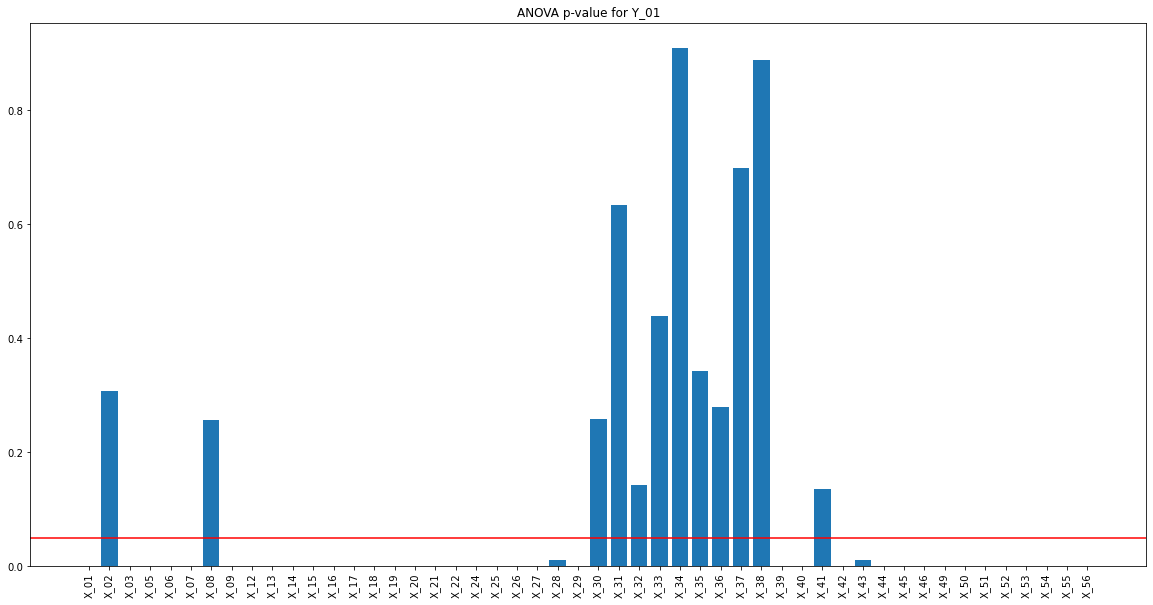

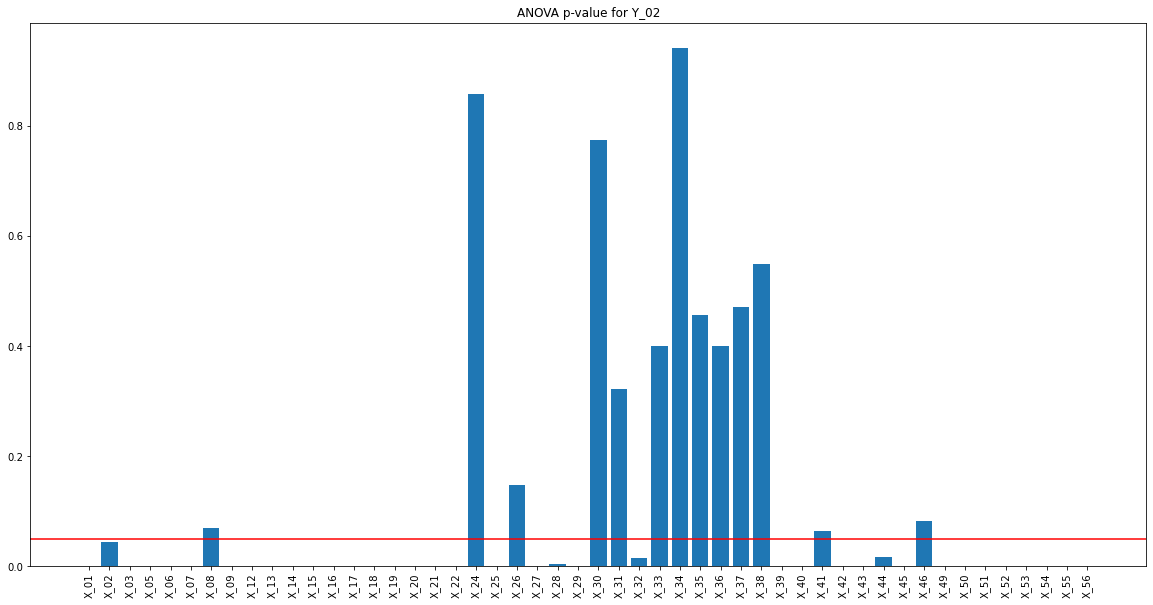

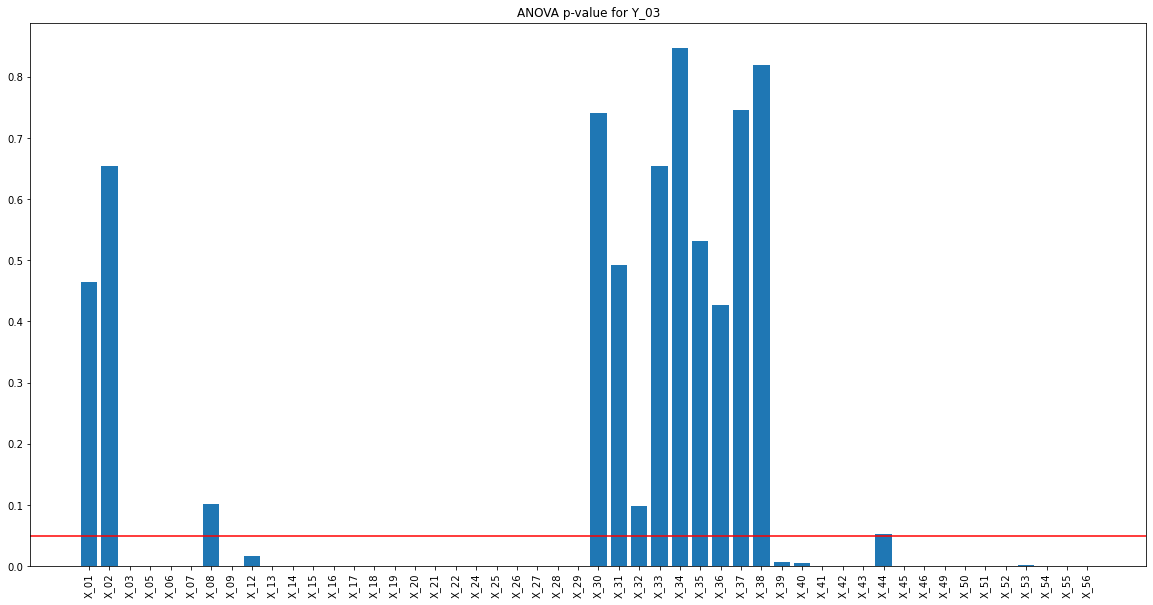

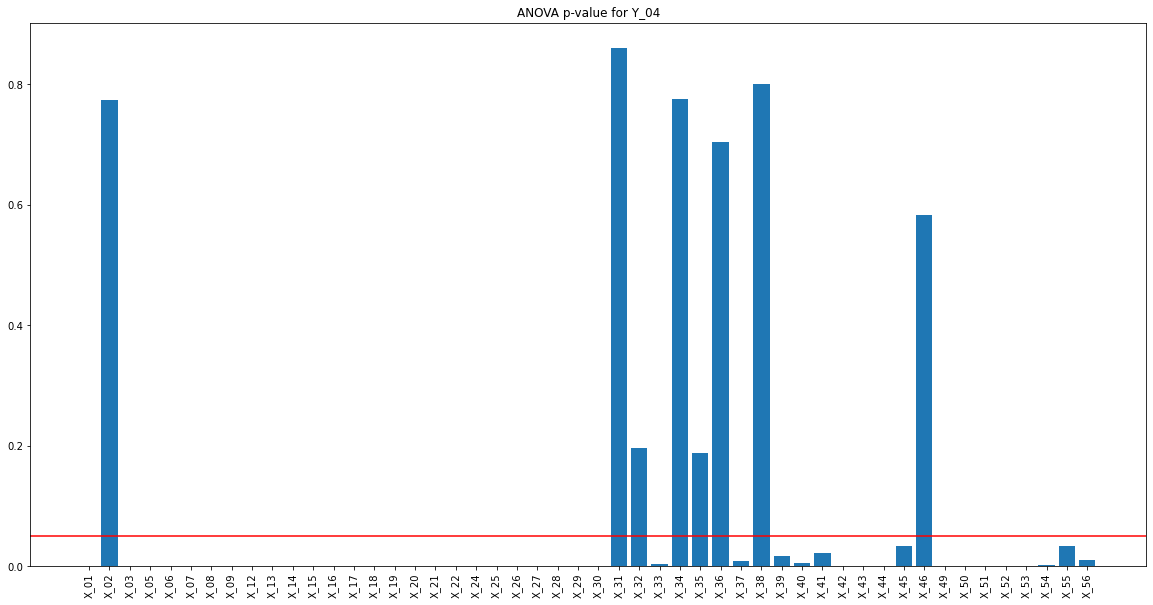

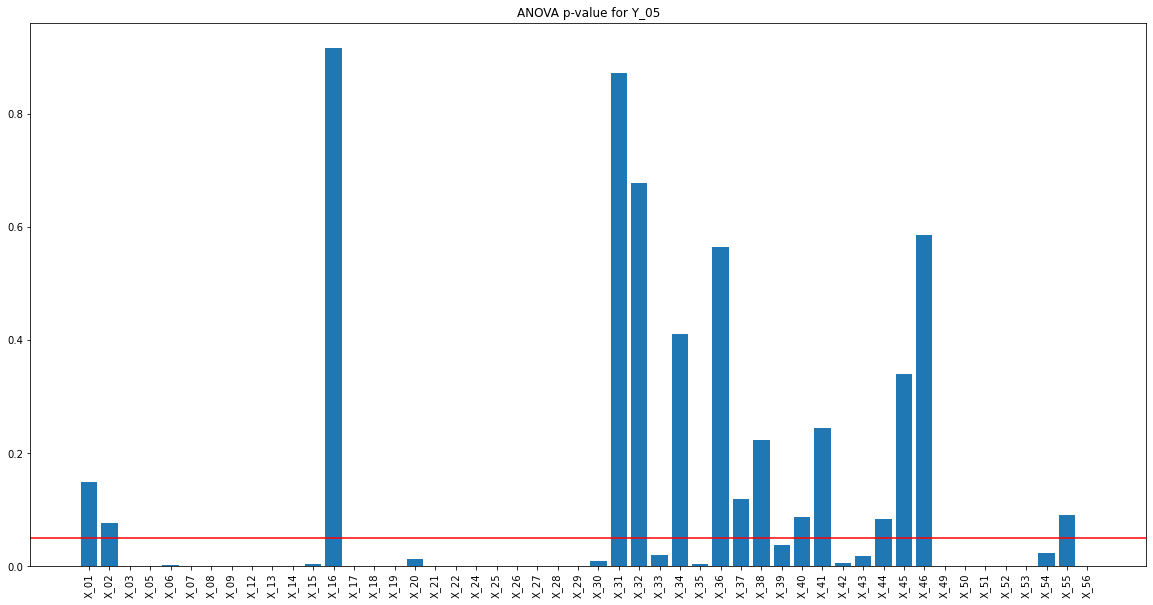

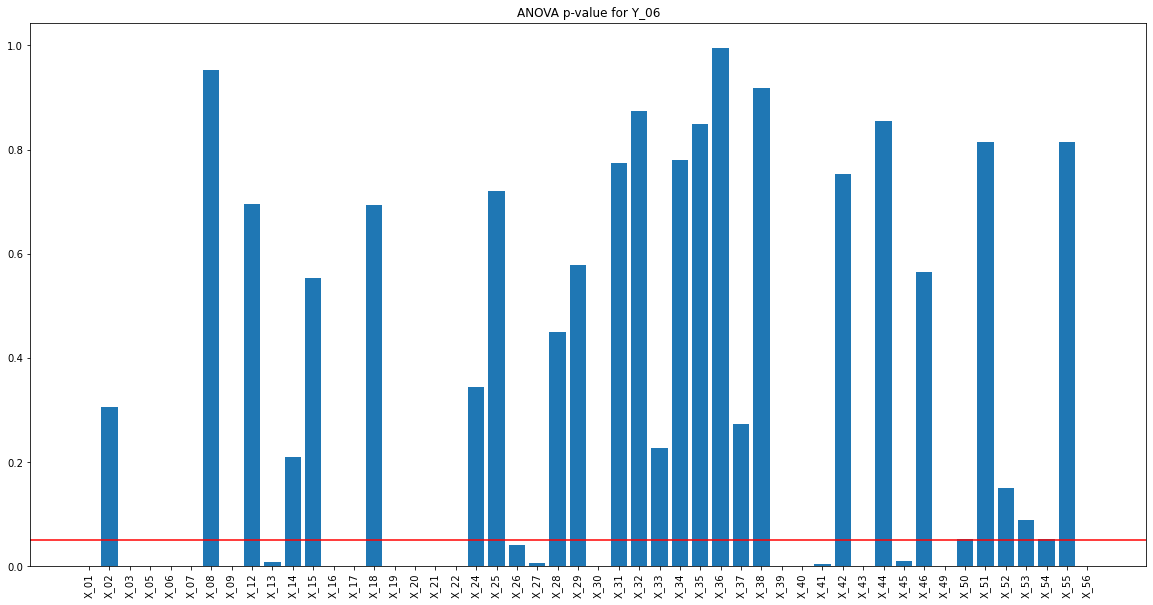

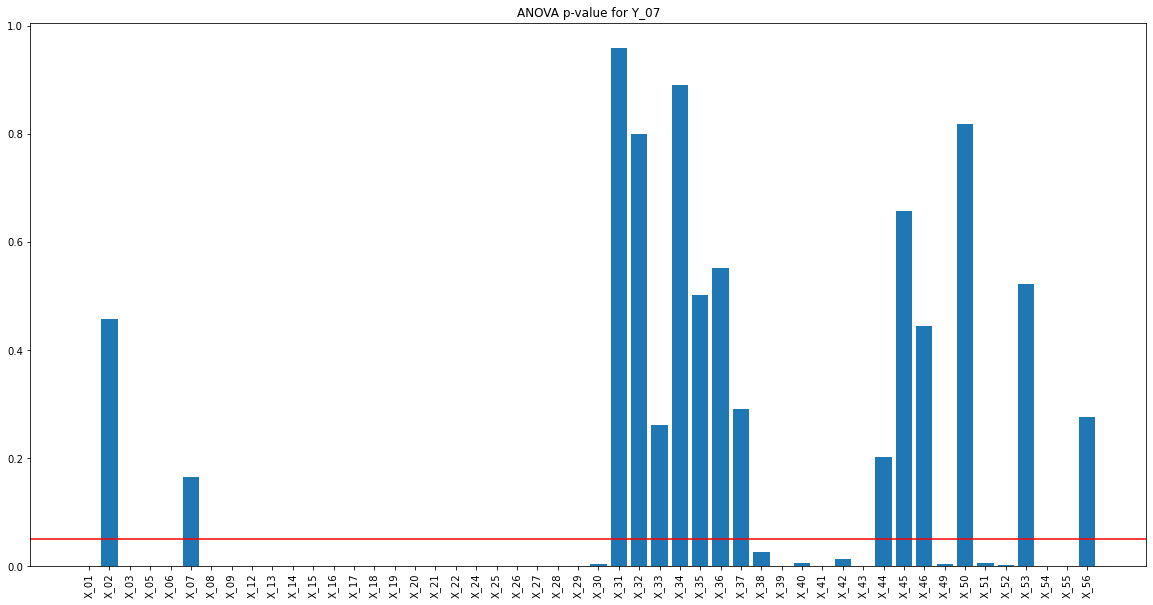

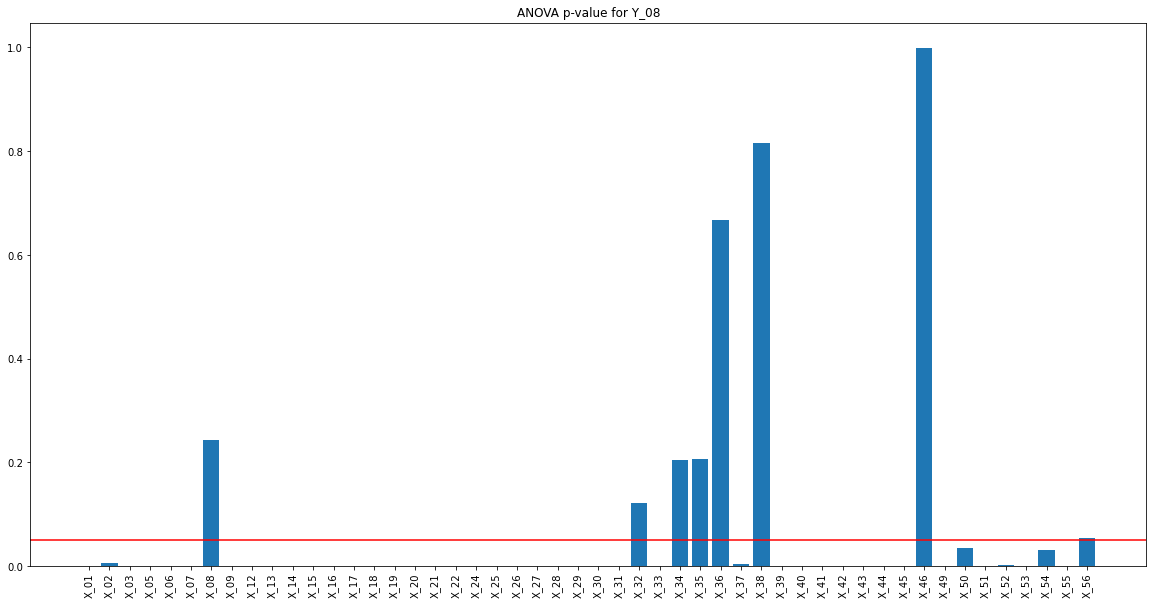

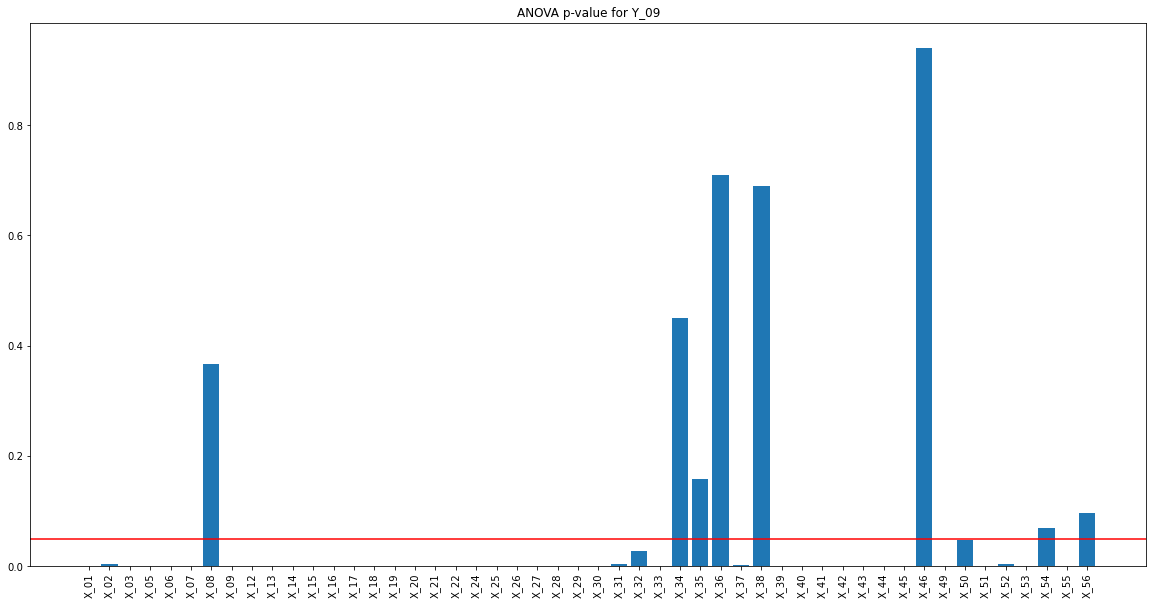

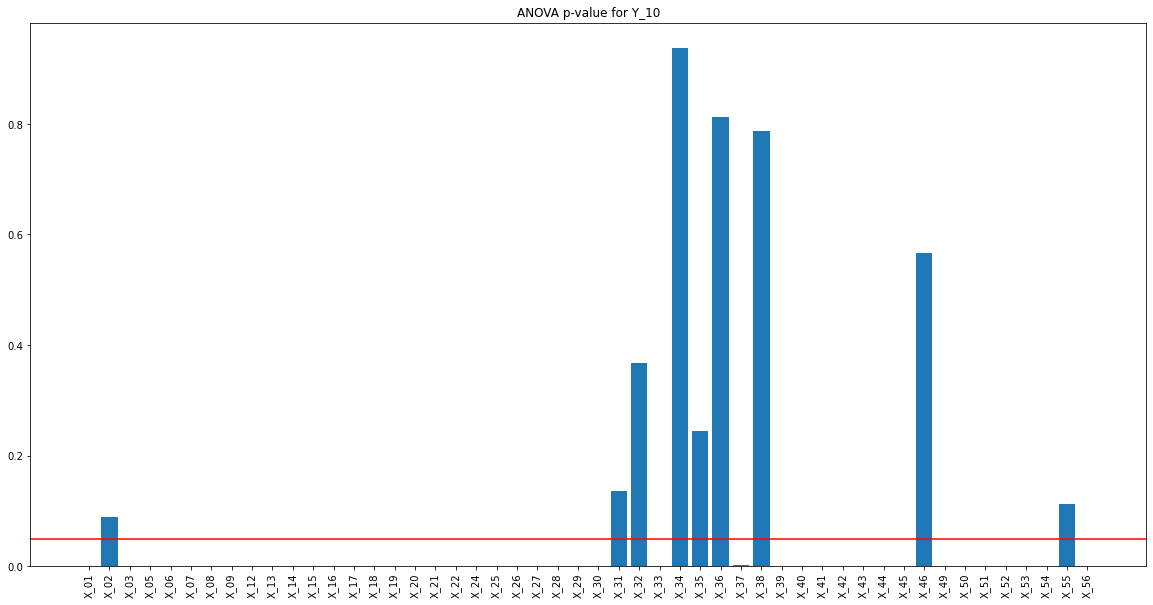

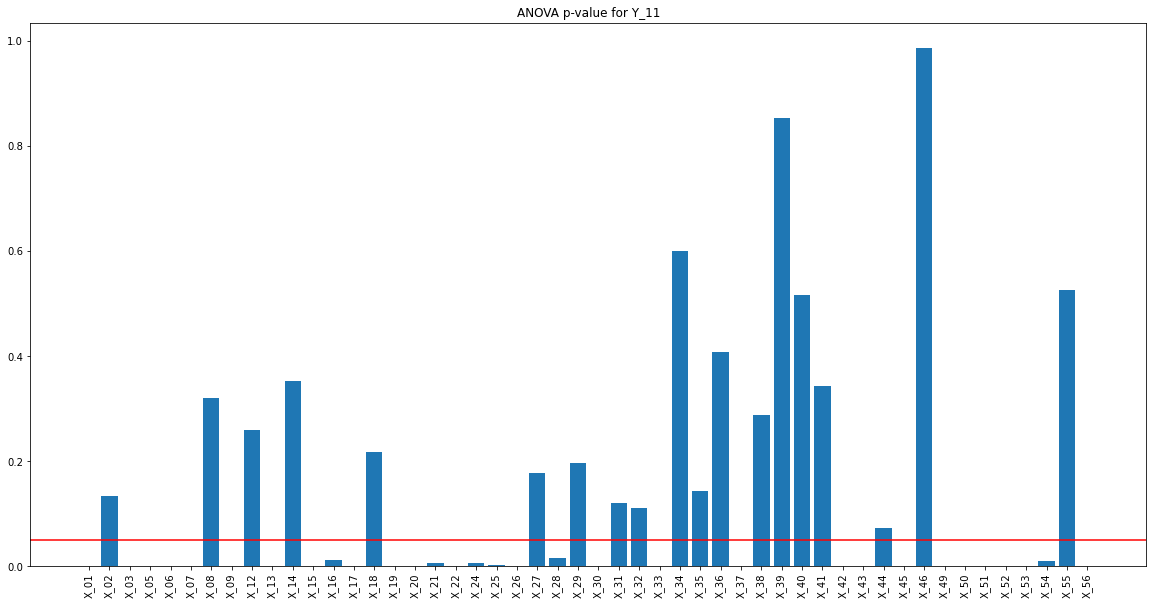

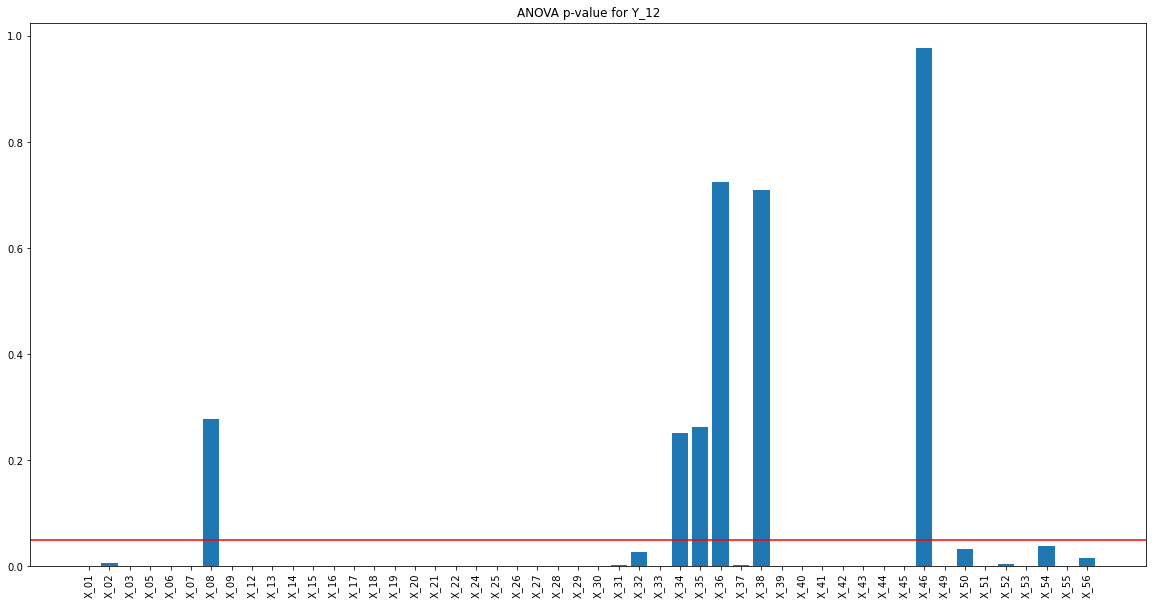

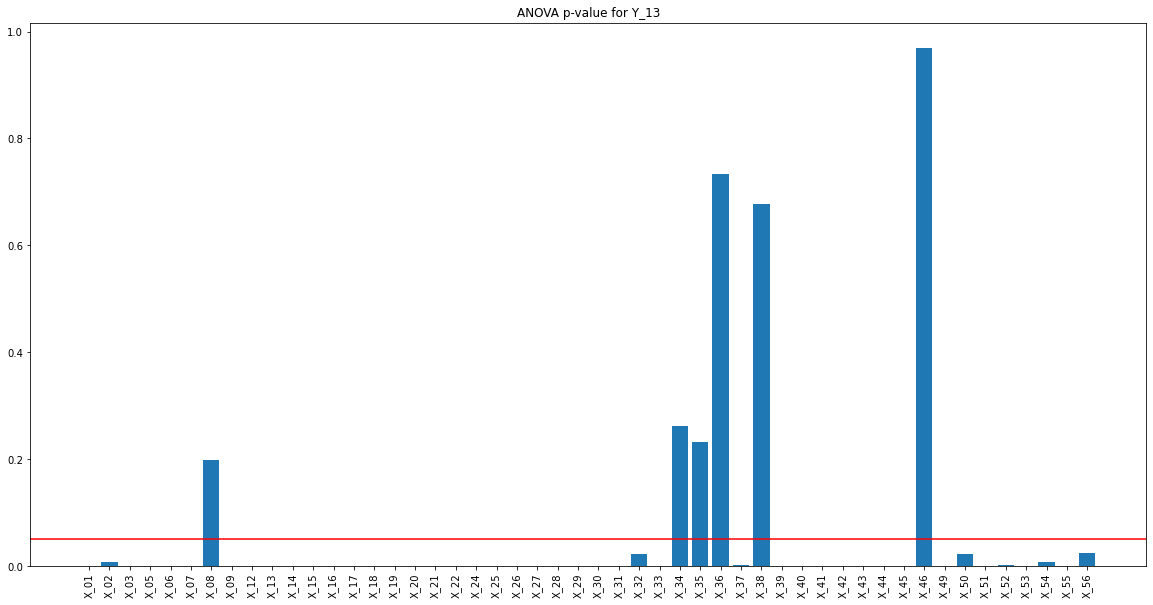

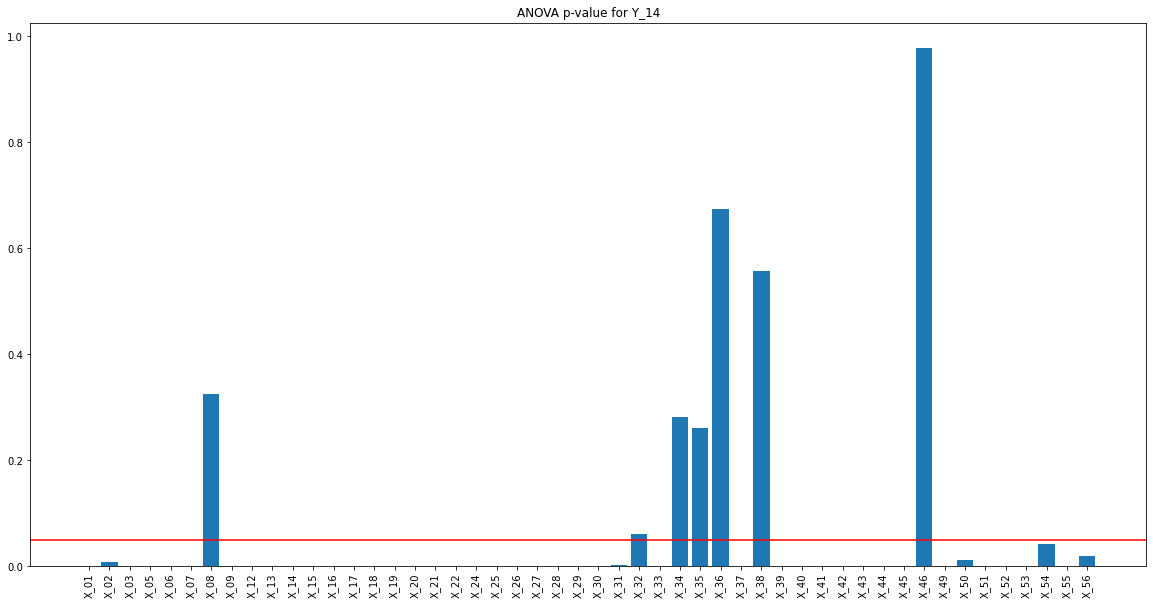

In [90]:
for i in range(0,14) :
    y_columns = i
    temp = pd.DataFrame(result.iloc[y_columns].reset_index())
    plt.figure(figsize=(20,10))
    plt.bar(temp['index'], temp[y_columns])
    plt.xticks(rotation=90)
    plt.axhline(y=0.05, color='r', linestyle='-')
    plt.title(f'ANOVA p-value for {y.columns[y_columns]}')
    plt.show()